In [19]:
%cd D:/SAME/Msc/5th semester/ANN and deep learning/HWs/mini2

D:\SAME\Msc\5th semester\ANN and deep learning\HWs\mini2


In [20]:
import os
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)
df_A = web.DataReader("AAPL","yahoo", start, end)
df_G = web.DataReader('GOOG','yahoo',start, end)

In [21]:
df_A.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,116.860001,115.809998,115.919998,116.610001,22193600.0,111.129562
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.368469
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,113.397697
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,113.512070
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.121986


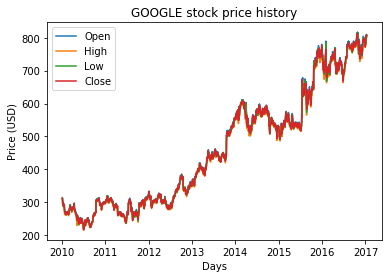

In [23]:
from matplotlib import pyplot as plt

plt.figure()
plt.plot(df_G['High'])
plt.plot(df_G['Low'])
plt.plot(df_G['Open'])
plt.plot(df_G['Close'])
plt.title('GOOGLE stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

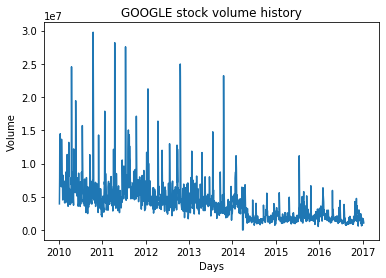

In [24]:
plt.figure()
plt.plot(df_G["Volume"])
plt.title('GOOGLE stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [25]:
print("checking if any null values are present\n", df_G.isna().sum())

checking if any null values are present
 High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

train_cols = ['Open', 'High', 'Low', 'Close', 'Volume']

goog_train, goog_test = train_test_split(df_G, train_size = 0.8, test_size = 0.2, shuffle = False)
print('Train and Test Size', len(goog_train), len(goog_test))

x_G = goog_train.loc[:,train_cols].values
min_max_scaler = MinMaxScaler()

x_train_G = min_max_scaler.fit_transform(x_G)
x_test_G = min_max_scaler.transform(goog_test.loc[:,train_cols])


Train and Test Size 1415 354


In [ ]:
def build_timeseries(mat, y_col_index):
    # y_col_index is the index of column that would act as output column
    # total number of time-series samples would be len(mat) - TIME_STEPS
    dim_0 = mat.shape[0] - TIME_STEPS
    dim_1 = mat.shape[1]
    x = np.zeros((dim_0, TIME_STEPS, dim_1))
    y = np.zeros((dim_0,))
    
    for i in tqdm_notebook(range(dim_0)):
        x[i] = mat[i:TIME_STEPS+i]
        y[i] = mat[TIME_STEPS+i, y_col_index]
    print("length of time-series i/o",x.shape,y.shape)
    return x, y